<a id = '4.0'></a>
<p style = "font-size : 35px; color : #34656d ;  text-align : center; background-color : #08f9f9; border-radius: 5px 5px;"><strong>Poliynomial Regression-Overfiting-Underfiting</strong></p> 

Polynomial Regression is a form of regression analysis in which the relationship 
between the independent variables and dependent variables are modeled in the nth degree polynomial.

Polinom Regresyon , bağımsız değişkenler ile bağımlı değişkenler arasındaki ilişkinin n'inci derece 
polinomda modellendiği bir regresyon analizi şeklidir.

Types of polinomials

1st degree ---> linear    b1x + b0

2nd degree ---> Quadratic b2x**2 + b1x + b0

3rd degree ---> Cubic     b3x**3 + b2x**2 + b1x + b0

# Underfitting and Overfitting
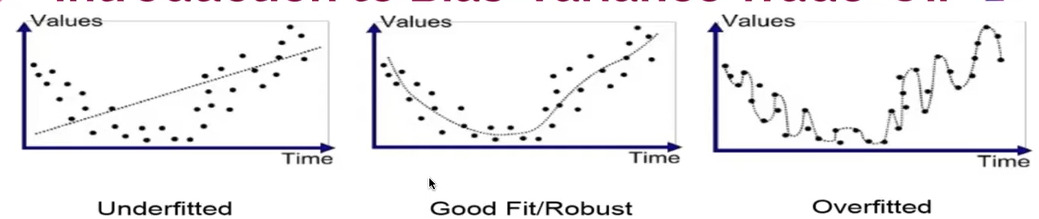
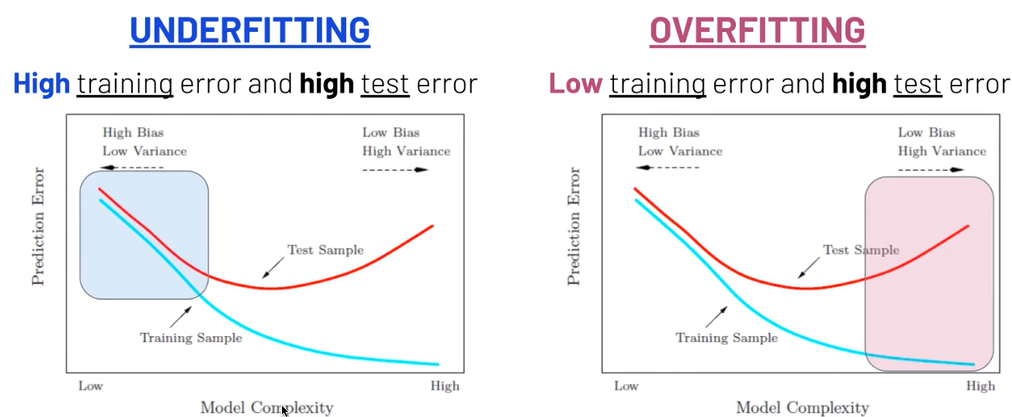
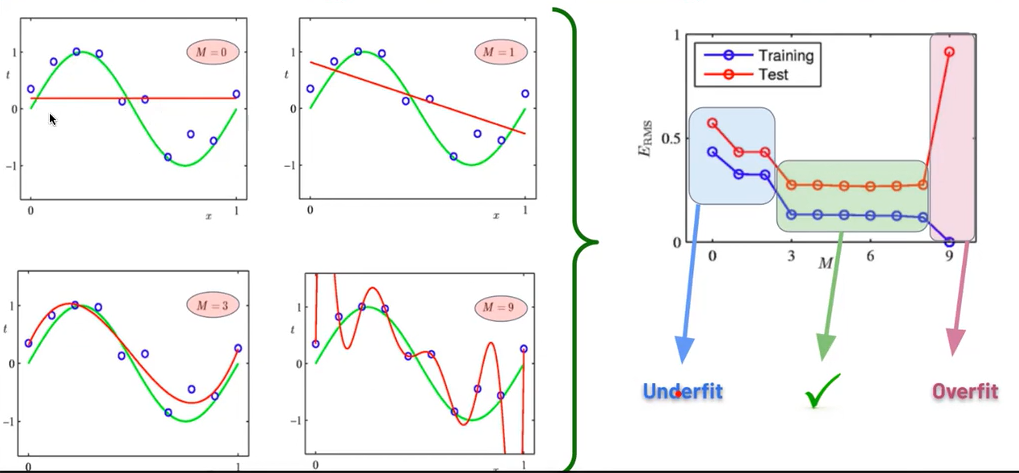
**M denotes the model complexity**
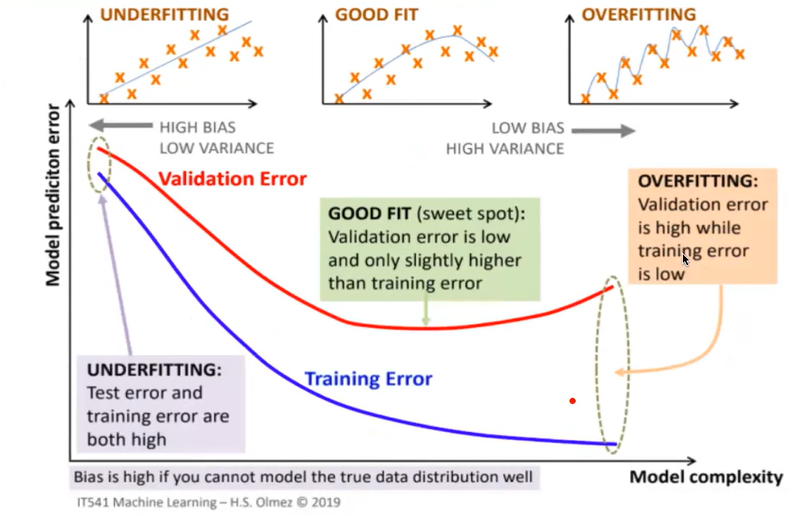
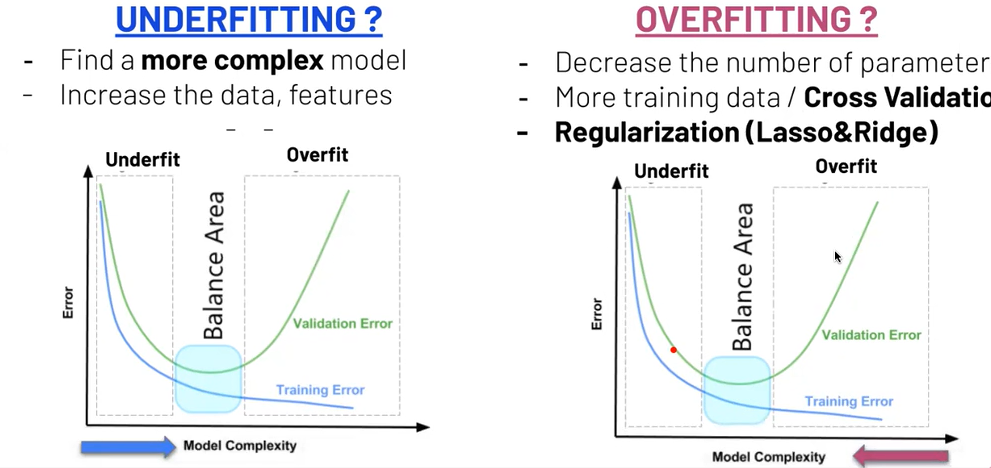
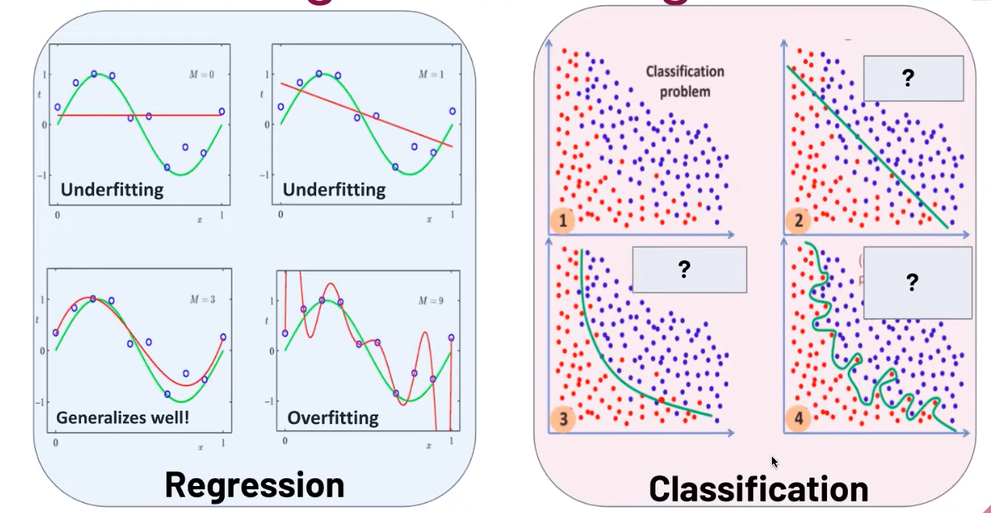
**2: Underfitting: High Bias-Low Variance, 3: Generalizes well: Low Bias-Low Variance, 4: Overfitting : Low Bias-High Variance**

# Polynomial Regression

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

## Polynomial Features

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [3]:
data = np.array([[2, 3, 4]]) 
print(data)

[[2 3 4]]


In [7]:
trans = PolynomialFeatures(degree = 2, include_bias =False)

In [8]:
trans.fit(data) # 2, 3, 4 , 2x3, 2x4, 3x4, 2**2, 3**2, 4**2

PolynomialFeatures(include_bias=False)

In [9]:
# 2, 3, 4, 2x3, 2x4, 3x4, 2**2, 3**2, 4**2, 2x3x4, 3x2**2, 4x2**2, 2x3**2, 4x3**2, 2x4**2, 3x4**2, 2**3, 3**3, 4**3

In [12]:
trans.transform(data)

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

In [13]:
trans.fit_transform(data) # combining method

array([[ 2.,  3.,  4.,  4.,  6.,  8.,  9., 12., 16.]])

## Read Dataset

In [14]:
df = pd.read_csv("Advertising.csv")

In [15]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Polynomial Converter

In [18]:
X = df.drop("sales", axis =1)  # input, features, attributes
y = df.sales  # output, target, label

In [25]:
# transform to polynomial features
polynomial_converter = PolynomialFeatures(degree =2, include_bias =False)  # include_bias =False means there is no intercept

In [20]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [21]:
poly_features = polynomial_converter.transform(X)

In [22]:
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [23]:
poly_features.shape  # There are 9 features no more

(200, 9)

In [24]:
pd.DataFrame(poly_features, columns = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"]).head()

,TV,radio,newspaper,TV^2,TV&Radio,TV&Newspaper,Radio^2,Radio&newspaper,Newspaper^2
0,230.1,37.8,69.2,52946.01,8697.78,15922.92,1428.84,2615.76,4788.64
1,44.5,39.3,45.1,1980.25,1748.85,2006.95,1544.49,1772.43,2034.01
2,17.2,45.9,69.3,295.84,789.48,1191.96,2106.81,3180.87,4802.49
3,151.5,41.3,58.5,22952.25,6256.95,8862.75,1705.69,2416.05,3422.25
4,180.8,10.8,58.4,32688.64,1952.64,10558.72,116.64,630.72,3410.56


In [26]:
X.shape

(200, 3)

## Train | Test Split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
# instead of X, we use poly_features

In [29]:
# X_train, X_test, y_train, y_test

In [31]:
X_train.shape

(140, 9)

## Model for fitting

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model_poly = LinearRegression()
# LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
# to minimize the residual sum of squares between the observed targets in
# the dataset, and the targets predicted by the linear approximation.

In [38]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model_poly.predict(X_test)

In [41]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
37,14.7,13.948562,0.751438
109,19.8,19.334803,0.465197
31,11.9,12.319282,-0.419282
89,16.7,16.762863,-0.062863
66,9.5,7.902109,1.597891
119,6.6,6.941438,-0.341438
54,20.2,20.133727,0.066273
74,17.0,17.500927,-0.500927
145,10.3,10.568890,-0.268890
142,20.1,20.125518,-0.025518


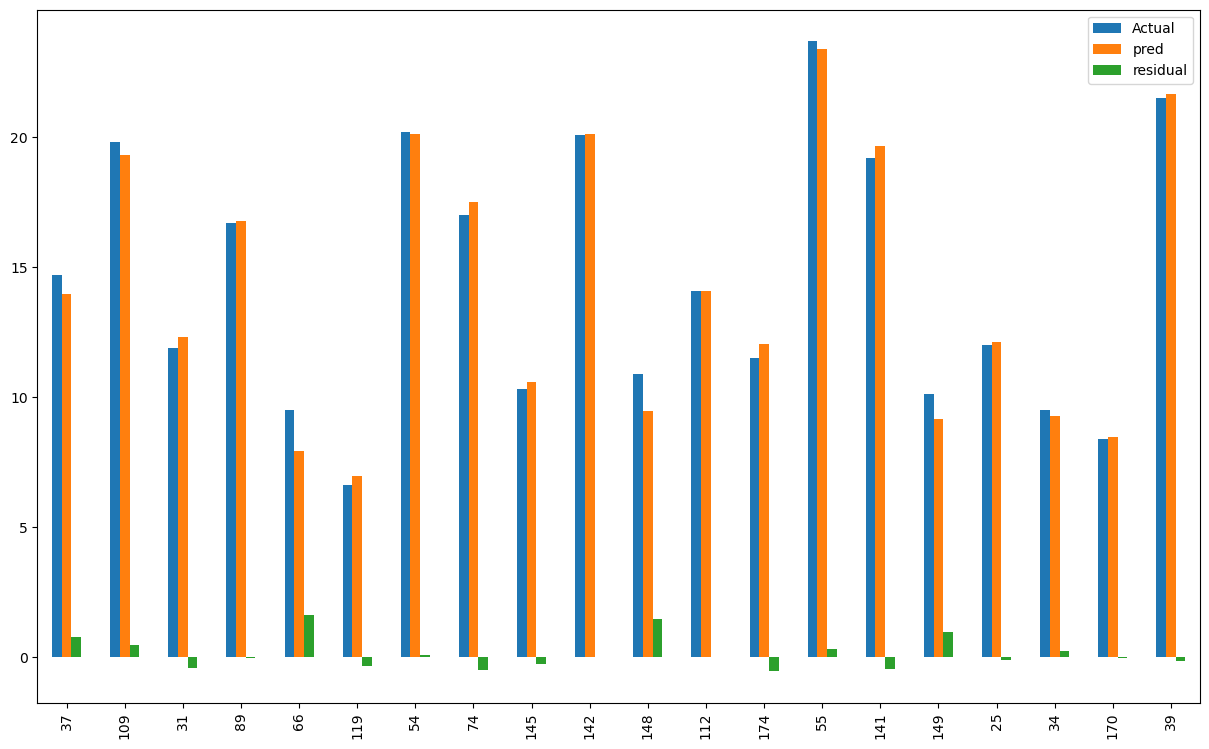

In [42]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

## Poly Coefficients

In [44]:
model_poly.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [45]:
df_coef = pd.DataFrame(model_poly.coef_, index = ["TV", "radio", "newspaper", "TV^2", "TV&Radio", \
                                   "TV&Newspaper", "Radio^2", "Radio&newspaper", "Newspaper^2"], columns = ["coef"])

In [46]:
df_coef

,coef
TV,0.051710
radio,0.013085
newspaper,0.012000
TV^2,-0.000111
TV&Radio,0.001142
TV&Newspaper,-0.000052
Radio^2,0.000033
Radio&newspaper,0.000146
Newspaper^2,-0.000030


In [47]:
model_poly.predict([[2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03]])

array([21.86190699])

## Evaluation on the Test Set

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

We predict and evaluation with test data.

In [53]:
# prediction
y_pred = model_poly.predict(X_test)

In [54]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)  # actual = y_test, pred = y_pred
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [55]:
eval_metric(y_test, y_pred)

Model performance:
--------------------------
R2_score 	: 0.9843529333146783
MAE 		: 0.4896798044803816
MSE 		: 0.4417505510403749
RMSE 		: 0.6646431757269271


Noe, lets's predict and evaluation with test data.

In [56]:
y_train_pred = model_poly.predict(X_train)

In [57]:
eval_metric(y_train, y_train_pred)

Model performance:
--------------------------
R2_score 	: 0.9868638137712757
MAE 		: 0.40492481391516394
MSE 		: 0.3456939142443995
RMSE 		: 0.5879574085292228


* Simple Linear Regression:
    * MAE      : 1.213
    * RMSE     : 1.516
    * r2_score : 0.8609

* Polynomial 2-degree:
    * MAE      : 0.48
    * RMSE     : 0.66
    * r2_score : 0.9868

We see that the 2nd order polynomial gives better results than linear regression for this data.

## Let's find optimal degree of poly

In [58]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    degrees=[]
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        degrees.append(i)
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "Degree":degrees}, 
                        index=range(1,d))
        

In [59]:
poly(10)

,train_rmse_errors,test_rmse_errors,Degree
1,1.734594,1.516152,1
2,0.587957,0.664643,2
3,0.433934,0.580329,3
4,0.351708,0.507774,4
5,0.250934,2.575831,5
6,0.197126,4.492669,6
7,5.421420,1381.404374,7
8,0.141804,4449.599765,8
9,0.166544,95891.245438,9


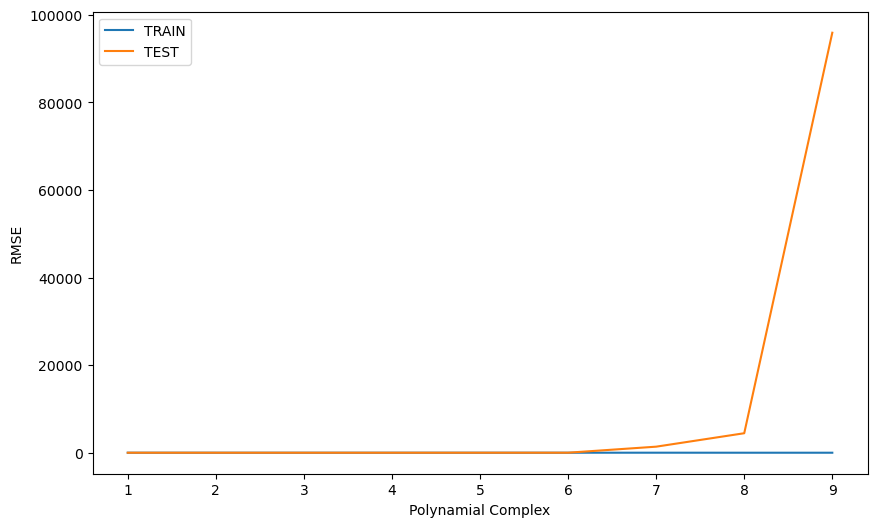

In [60]:
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

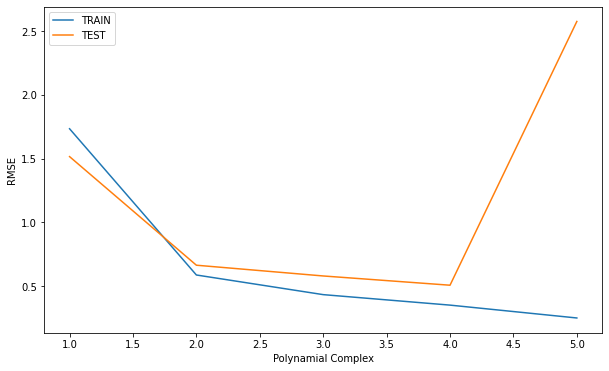

In [47]:
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();

> Model Complexity 2 to 4 looks goodfitting, but 2 and 4 are breakpoints so these should be avoided. Since the error is high at values less than 2, the underfitting dir bias is high. Since the variance is high for values greater than 4, the model has memorized overfitting here as well.

## Finalizing Model Choice

In [64]:
final_poly_converter = PolynomialFeatures(degree = 3, include_bias=False)

In [67]:
final_model = LinearRegression()  # building model, fit_intercept=True

In [68]:
final_model.fit(final_poly_converter.fit_transform(X), y)  # training model
# After all, we train with all the data. We have determined the degree of the model, so we will train with all the data. 

LinearRegression()

## Predictions

In [72]:
new_record = [[150, 20, 15]]

In [73]:
new_record_poly = final_poly_converter.fit_transform(new_record)

In [75]:
new_record_poly

array([[1.500e+02, 2.000e+01, 1.500e+01, 2.250e+04, 3.000e+03, 2.250e+03,
        4.000e+02, 3.000e+02, 2.250e+02, 3.375e+06, 4.500e+05, 3.375e+05,
        6.000e+04, 4.500e+04, 3.375e+04, 8.000e+03, 6.000e+03, 4.500e+03,
        3.375e+03]])

In [76]:
final_model.predict(new_record_poly) 

array([14.24950844])

## <span style='color:red'> Overfitting</span> 

In [77]:
over_poly_converter = PolynomialFeatures(degree =5, include_bias =False)

In [78]:
over_model = LinearRegression()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(over_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [80]:
over_model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_pred_over = over_model.predict(X_test)
eval_metric(y_test, y_pred_over)

Model performance:
--------------------------
R2_score 	: 0.764987677771052
MAE 		: 0.6659587783286991
MSE 		: 6.634906397076024
RMSE 		: 2.5758312050823564


In [83]:
y_train_over = over_model.predict(X_train)
eval_metric(y_train, y_train_over)

Model performance:
--------------------------
R2_score 	: 0.9976072484752844
MAE 		: 0.1862132647522389
MSE 		: 0.06296802024506248
RMSE 		: 0.2509342946770379


## <span style='color:red'> Underfitting</span> 

In [84]:
under_poly_converter = PolynomialFeatures(degree =1, include_bias =False)

In [85]:
under_model = LinearRegression()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(under_poly_converter.fit_transform(X), y, test_size=0.3, random_state=101)

In [87]:
under_model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred_under = under_model.predict(X_test)
eval_metric(y_test, y_pred_under)

Model performance:
--------------------------
R2_score 	: 0.9185780903322446
MAE 		: 1.2137457736144808
MSE 		: 2.298716697886378
RMSE 		: 1.5161519375993877


In [89]:
y_train_under = under_model.predict(X_train)
eval_metric(y_train, y_train_under)

Model performance:
--------------------------
R2_score 	: 0.8856665510409361
MAE 		: 1.2524463034168645
MSE 		: 3.0088167761579956
RMSE 		: 1.7345941243293763
